# Carga de datos

In [102]:
# Importo bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression

# Cargo los datos
imdb_data = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectIMDB/data/movie_metadata.csv")



# Análisis exploratorio de datos (EDA)

In [103]:
# Visualizo las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
imdb_data.head()

# Imprimo las columnas del dataframe
columnas = imdb_data.columns
print("Columnas del DataFrame:")
print(columnas)

Primeras filas del conjunto de datos:
Columnas del DataFrame:
Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [104]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
imdb_data.describe()


Estadísticas descriptivas:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


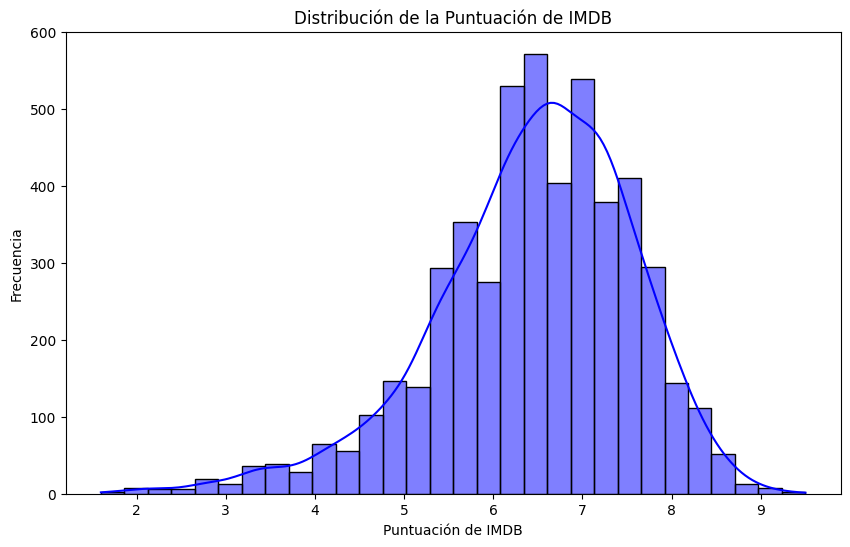

In [105]:
# Visualizo la distribución de la puntuación de IMDB
plt.figure(figsize=(10, 6))
sns.histplot(imdb_data['imdb_score'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Puntuación de IMDB')
plt.xlabel('Puntuación de IMDB')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-106-2fa6bf7f24f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = imdb_data.corr()


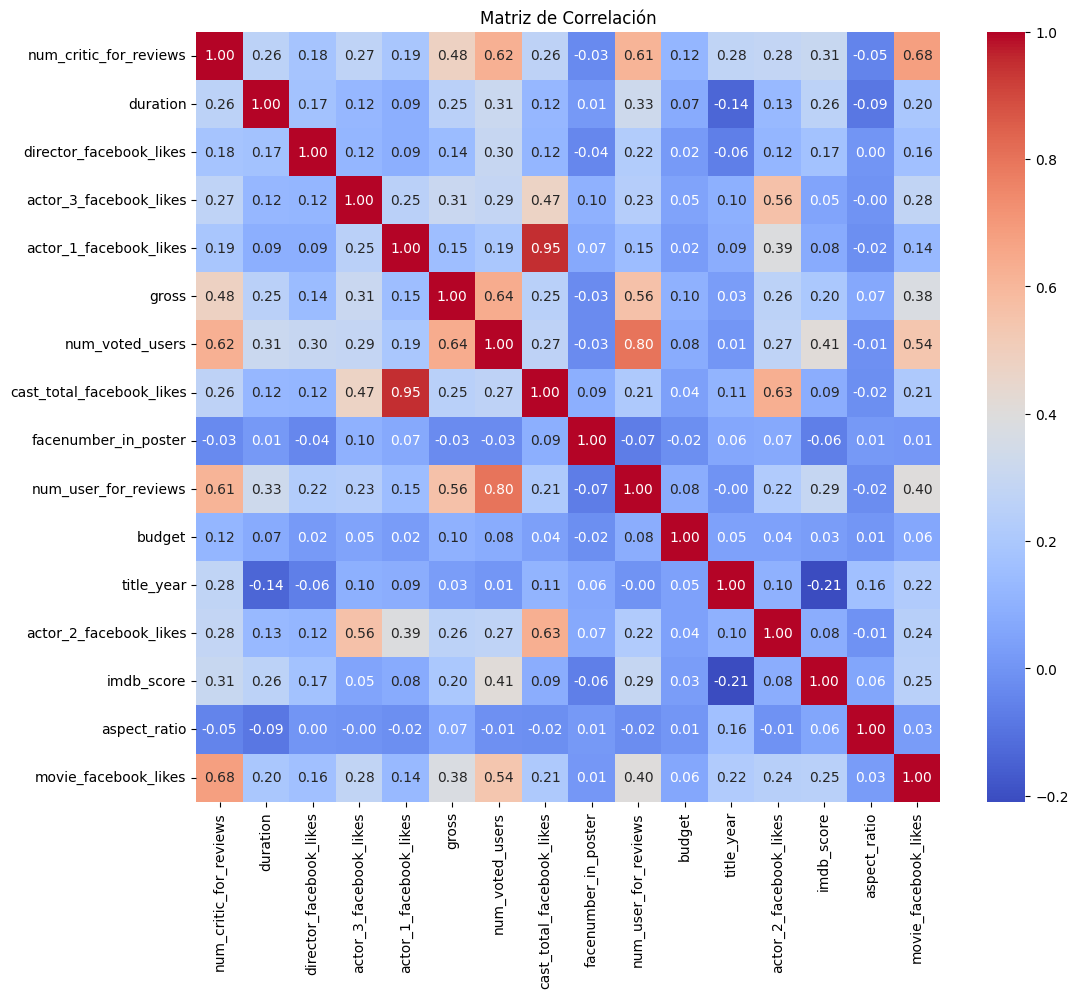

In [106]:
# Visualizo la correlación entre algunas variables
correlation_matrix = imdb_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Preprocesamiento de datos

In [107]:
# Manejo de valores nulos
imdb_data = imdb_data.dropna()

# Hago la comprobación después del manejo de valores nulos
print("\nTamaño del conjunto de datos después de manejar nulos:", imdb_data.shape)

 # Elimino los espacios que pueda llegar a haber en los registros.

colum_name_fixed = imdb_data.columns.str.replace(' ', '')
colum_name_fixed = dict(zip(imdb_data.columns, colum_name_fixed))
imdb_data.rename(columns = colum_name_fixed, inplace = True)

# Codifico las variables categóricas.
numeric_features = list(imdb_data.dtypes[imdb_data.dtypes != "object"].index)

non_numeric_features = list(imdb_data.dtypes[imdb_data.dtypes == "object"].index)


Tamaño del conjunto de datos después de manejar nulos: (3756, 28)


<ipython-input-107-e530751088fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data.rename(columns = colum_name_fixed, inplace = True)


In [108]:
# Visualizo la lista de las variables numéricas
numeric_features

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [109]:
# Visualizo la lista de las variables no numéricas
non_numeric_features

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

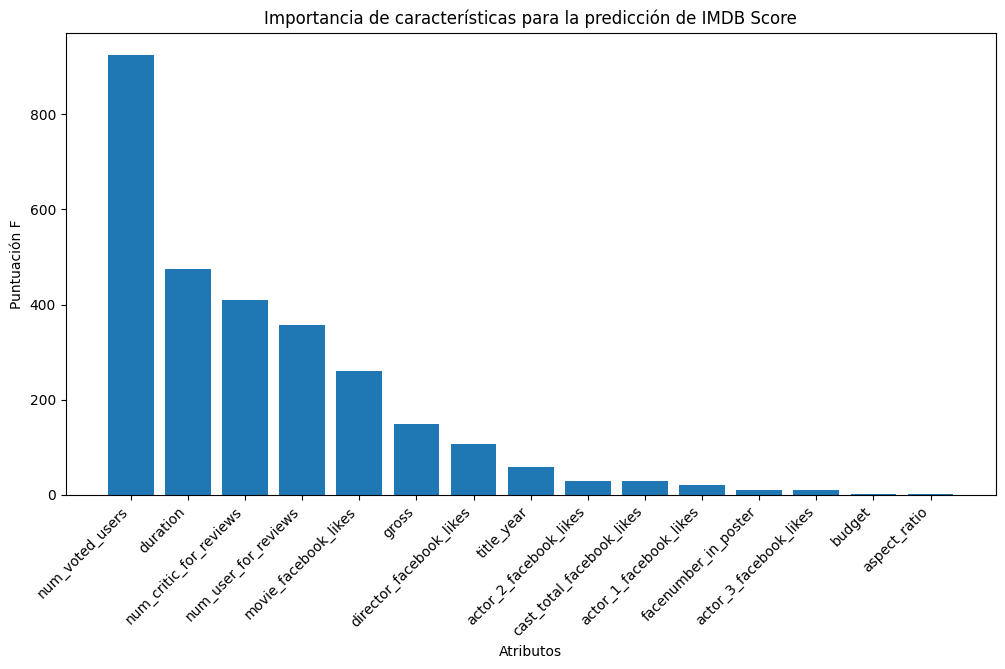

In [110]:
# Selecciono atributos (numeric_features) y variable objetivo
features = imdb_data[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
               'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes',
               'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year',
               'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']]

target = imdb_data['imdb_score']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creo un modelo de regresión lineal
model = LinearRegression()

# Entreno el modelo
model.fit(X_train, y_train)

# Obtengo las puntuaciones de importancia de las características utilizando F-statistics
f_scores, _ = f_regression(X_train, y_train)

# Creo un DataFrame para visualizar las puntuaciones de importancia
importance_df = pd.DataFrame({'Feature': features.columns, 'F-Score': f_scores})
importance_df = importance_df.sort_values(by='F-Score', ascending=False)

# Visualizo las puntuaciones de importancia
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['F-Score'])
plt.title('Importancia de características para la predicción de IMDB Score')
plt.xlabel('Atributos')
plt.ylabel('Puntuación F')
plt.xticks(rotation=45, ha='right')
plt.show()

In [111]:
# Visualizo el nuevo dataframe con las características más importantes
importance_df

,Feature,F-Score
6,num_voted_users,924.886167
1,duration,473.856523
0,num_critic_for_reviews,410.445445
9,num_user_for_reviews,357.655298
14,movie_facebook_likes,259.904734
5,gross,149.496185
2,director_facebook_likes,106.181604
11,title_year,58.073438
12,actor_2_facebook_likes,28.700591
7,cast_total_facebook_likes,28.443929


# Selección, entrenamiento y evaluación del modelo

In [112]:
# En base al gráfico anterior selecciono las características relevantes
features = imdb_data[['num_voted_users', 'duration', 'num_critic_for_reviews', 'num_user_for_reviews', 'movie_facebook_likes']]

# Visualizo las primeras filas del conjunto de datos procesado
print("\nConjunto de datos procesado:")
print(features.head())

# Verifico que las columnas en 'features' existan en el conjunto de datos
assert all(col in imdb_data.columns for col in features.columns), "Algunas columnas en 'features' no están en el conjunto de datos"

target = imdb_data['imdb_score']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creo un modelo de regresión lineal
model = make_pipeline(StandardScaler(), LinearRegression())

# Entreno el modelo
model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evalúo el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
print(f"\nError Cuadrático Medio: {mse}")



Conjunto de datos procesado:
   num_voted_users  duration  num_critic_for_reviews  num_user_for_reviews  \
0           886204     178.0                   723.0                3054.0   
1           471220     169.0                   302.0                1238.0   
2           275868     148.0                   602.0                 994.0   
3          1144337     164.0                   813.0                2701.0   
5           212204     132.0                   462.0                 738.0   

   movie_facebook_likes  
0                 33000  
1                     0  
2                 85000  
3                164000  
5                 24000  

Error Cuadrático Medio: 0.7881009809453542


# Ejemplo de predicción de una película

In [113]:
# Ejemplo: Predicción para una película:
new_data = pd.DataFrame([[900, 120, 1000, 1000, 800]], columns=['num_voted_users', 'duration', 'num_critic_for_reviews', 'num_user_for_reviews', 'movie_facebook_likes'])
predicted_score = model.predict(new_data)
print(f"Puntuación predicha de IMDB para nuevas películas (0=calificación más baja y 10=calificación más alta): {predicted_score[0]:.2f}")


Puntuación predicha de IMDB para nuevas películas (0=calificación más baja y 10=calificación más alta): 7.00


# Aplicación que permite ingresar los parámetros de una película (en base al modelo entrenado) y calcular la puntuación de la misma:

In [116]:
# Defino la función para predecir la puntuación de IMDB
def predict_imdb_score(num_voted_users, duration, num_critic_for_reviews, num_user_for_reviews, movie_facebook_likes):
    new_data = pd.DataFrame([[num_voted_users, duration, num_critic_for_reviews, num_user_for_reviews, movie_facebook_likes]], columns=features.columns)
    predicted_score = model.predict(new_data)

    # Limito la predicción al rango de 0 a 10
    predicted_score = max(0, min(predicted_score[0], 10))

    return predicted_score

# Solicito los parámetros de la película
num_voted_users = float(input("Ingrese el número de usuarios que votaron por la película: "))
duration = float(input("Ingrese la duración de la película (minutos): "))
num_critic_for_reviews = float(input("Ingrese el número de críticos que revisaron la película: "))
num_user_for_reviews = float(input("Ingrese el número de usuarios que revisaron la película: "))
movie_facebook_likes = float(input("Ingrese el número de Me gusta en Facebook de la película: "))

# Realizo la predicción
predicted_score = predict_imdb_score(num_voted_users, duration, num_critic_for_reviews, num_user_for_reviews, movie_facebook_likes)

# Imprimo la predicción
print(f"Puntuación predicha de IMDB para nuevas películas (0=calificación más baja y 10=calificación más alta): {predicted_score:.2f}")

Ingrese el número de usuarios que votaron por la película: 15700
Ingrese la duración de la película (minutos): 120
Ingrese el número de críticos que revisaron la película: 11000
Ingrese el número de usuarios que revisaron la película: 18000
Ingrese el número de Me gusta en Facebook de la película: 14000
Puntuación predicha de IMDB para nuevas películas (0=calificación más baja y 10=calificación más alta): 10.00
